In [10]:
using Plots
gr();

In [11]:
Plots.GRBackend();

In [12]:
using LaTeXStrings

In [13]:
#Valores en la frontera:
a = 1.0 #frontera izquierda
b = 3.0 #frontera derecha
α = 17.0   #y(a) = α
β = 43/3   #y(b) = β

M = 100 #número máximo de iteraciones
tolerancia = 0.0001
N = 1000 #número de subintervalos
h = (b-a)/N
tk = (β-α)/(b-a) #aproximación inicial de la pendiente a variar
;

In [14]:
function f(x,y,y2) return (1/8)*(32 + 2*x^3 - y*y2) end

function fy(x,y,y2) return (1/8)*(-y2) end

function fy2(x,y,y2) return (1/8)*(-y) end; #Derivada de f respecto a y'

In [15]:
function y(x) return x^2 + 16/x end; #solución analítica para comparar con la numérica

In [16]:
sol_analitica = [(a,α)]
sol_numerica = [(a,α)]
diferencia = [(0.0,0.0)]

k = 1
while k <= M:
global α,tk,u1,u2
w1 = [α]
w2 = [tk]
u1 = 0
u2 = 1
    for i in 2:N
        global u1,u2
        x = a + (i-2)*h
##### Definición de términos de Runge-Kutta
        k11 = h*w2[i-1]
        k12 = h*f(x,w1[i-1],w2[i-1])
        k21 = h*(w2[i-1]+(0.5)*k12)
        k22 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k11, w2[i-1]+(0.5)*k12)
        k31 = h*(w2[i-1]+(0.5)*k22)
        k32 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k21, w2[i-1]+(0.5)*k22)
        k41 = h*(w2[i-1]+(0.5)*k32)
        k42 = h*f(x+h, w1[i-1]+(0.5)*k31, w2[i-1]+(0.5)*k32)

        w1y = w1[i-1] + (k11 + 2*k21 + 2*k31 + k41)*(1/6)
        w2y = w2[i-1] + (k12 + 2*k22 + 2*k32 + k42)*(1/6)
        push!(w1, w1y)
        push!(w2, w2y)
        c11 = h*u2
        c12 = h*(fy(x,w1[i-1],w2[i-1])*u1 + fy2(x,w1[i-1],w2[i-1])*u2)
        c21 = h*(u2+(0.5)*c12)
        c22 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)*c11) + fy2(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c21))
        c31 = h*(u2+(0.5)*c22)
        c32 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)c21) + fy2(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c22) )
        c41 = h*(u2+c32)
        c42 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+c31) + fy2(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+c32))
        u1 = u1 + (1/6)*(c11+2*c21+2*c31+c41)
        u2 = u2 + (1/6)*(c12+2*c22+2*c32+c42)
    end
    
    if abs(w1[N]-β)<=tolerancia
        for i in 1:N
            x = a + i*h
            push!(sol_analitica,(x,y(x)))
            push!(sol_numerica,(x,w1[i]))
            push!(diferencia, (x,abs(y(x)- w1[i])))
        end
        break
    else
        global u1,k,β
        tk = tk - (w1[N]-β)/u1
        k = k + 1
    end
end
deleteat!(diferencia,1);

LoadError: syntax: line break in ":" expression

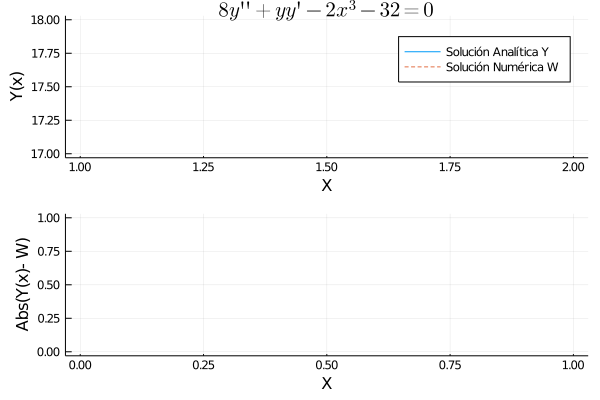

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
latex: failed to create a dvi file
latex: failed to create a dvi file


In [17]:
p1 = plot(sol_analitica, label = "Solución Analítica Y", line = (2)) 
plot!(sol_numerica, label = "Solución Numérica W", line = (2, :dash) )
ylabel!("Y(x)")
xlabel!("X")
title!(L"8y'' + yy' - 2x^3 - 32 = 0")
p2 = plot(diferencia, label = false)
xlabel!("X")
ylabel!("Abs(Y(x)- W)")
plot(p1, p2, layout = @layout([a; b]))